# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load datasets
df_sales = pd.read_csv('../datasets/sales_data.csv', parse_dates=['date'])
df_customers = pd.read_csv('../datasets/customer_data.csv', parse_dates=['signup_date'])
df_products = pd.read_csv('../datasets/product_catalog.csv')

# Group by

In [4]:
# Group df_sales by region and calculate total sales for each region
region_sales = df_sales.groupby('region')['total_amount'].sum().reset_index()
region_sales

,region,total_amount
0,Central,264570.70
1,East,242503.34
2,North,265889.05
3,South,212533.51
4,West,261290.44


In [8]:
# multiple aggregation
region_sales = df_sales.groupby('region')['total_amount'].agg([
    ('Total Sales','sum'), ('Average Sales','mean'), ('Number of Transactions','count'), ('Min Sales','min'), ('Max Sales','max')
    ]).reset_index()
region_sales

,region,Total Sales,Average Sales,Number of Transactions,Min Sales,Max Sales
0,Central,264570.70,1316.272139,201,32.74,4445.64
1,East,242503.34,1188.741863,204,39.53,4272.66
2,North,265889.05,1290.723544,206,37.97,4393.53
3,South,212533.51,1214.477200,175,12.82,4059.09
4,West,261290.44,1220.983364,214,40.52,4445.82


In [10]:
# Group df_sales by region and sales representative and calculate total sales for each group
rep_region_sales = df_sales.groupby(['region','sales_rep'])['total_amount'].sum().reset_index()
rep_region_sales

,region,sales_rep,total_amount
0,Central,David Lee,23823.43
1,Central,Jennifer Davis,30384.09
2,Central,John Smith,52100.90
3,Central,Lisa Martinez,25888.11
4,Central,Mary Johnson,33805.85
5,Central,Michael Brown,30403.22
6,Central,Robert Garcia,29869.05
7,Central,Sarah Wilson,38296.05
8,East,David Lee,44776.63
9,East,Jennifer Davis,26040.48


<Figure size 1200x600 with 0 Axes>

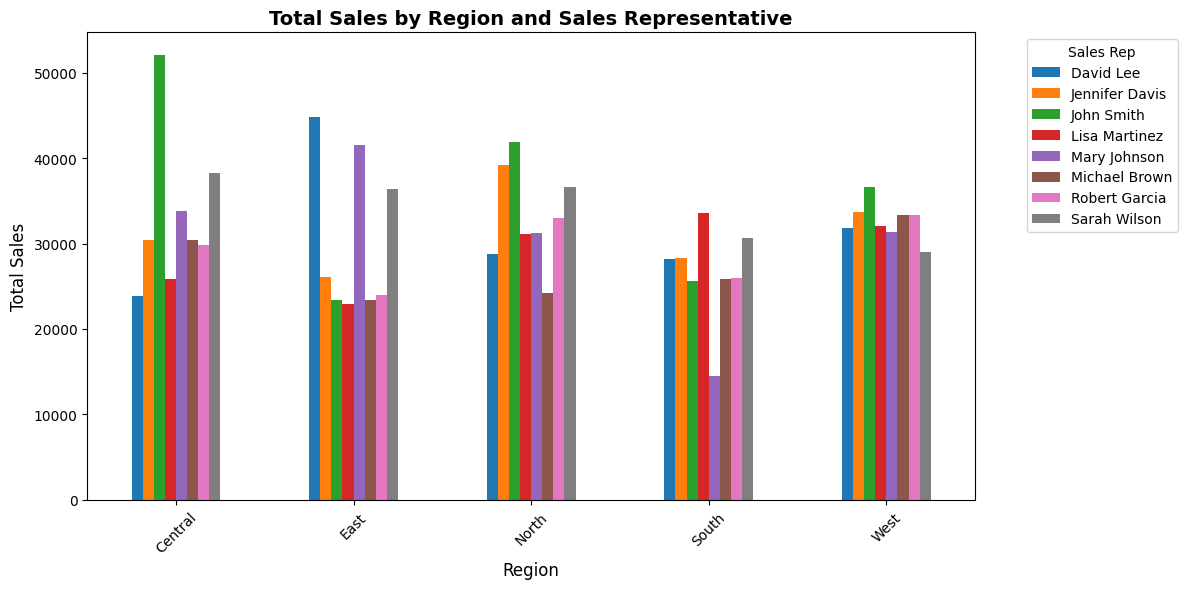

In [11]:
# Plot side-by-side bar chart
pivot_data = rep_region_sales.pivot(index='region', columns='sales_rep', values='total_amount')

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Region and Sales Representative', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Sales Rep', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# using .transform
df_sales['region_total'] = df_sales.groupby('region')['total_amount'].transform('sum')

# Merging Dataframe

In [22]:
sales_with_customer = pd.merge(df_sales, df_customers, on='customer_id', how='inner')
sales_with_customer.columns

Index(['transaction_id', 'date', 'product_id', 'customer_id', 'quantity',
       'unit_price', 'region', 'sales_rep', 'payment_method', 'total_amount',
       'region_total', 'first_name', 'last_name', 'email', 'phone', 'city',
       'state', 'signup_date', 'customer_segment', 'total_purchases',
       'lifetime_value'],
      dtype='object')

# Practice Exercise: Top performing sales analysis

In [30]:
# Left join customer and product data
sales_with_customer = pd.merge(df_sales, df_customers, on='customer_id', how='left')
sales_full = pd.merge(sales_with_customer, df_products, on='product_id', how='left')

In [33]:
df_sales.columns

Index(['transaction_id', 'date', 'product_id', 'customer_id', 'quantity',
       'unit_price', 'region', 'sales_rep', 'payment_method', 'total_amount',
       'region_total'],
      dtype='object')

In [36]:
# group by sales rep, find total sales, average sales, number of transactions, number of unique customers
rep_performance = sales_full.groupby('sales_rep').agg(
    total_sales=('total_amount', 'sum'),
    average_sales=('total_amount', 'mean'),
    num_transactions=('total_amount', 'count'),
    num_unique_customers=('customer_id', 'nunique')
)
# sort by total sales descending
rep_performance = rep_performance.sort_values(by='total_sales', ascending=False)
rep_performance

,total_sales,average_sales,num_transactions,num_unique_customers
sales_rep,,,,
John Smith,179529.26,1282.351857,140,101
Sarah Wilson,170948.05,1304.946947,131,94
Jennifer Davis,157553.11,1302.091818,121,90
David Lee,157357.05,1148.591606,137,108
Mary Johnson,152305.20,1228.267742,124,88
Robert Garcia,146200.35,1329.094091,110,84
Lisa Martinez,145696.74,1245.271282,117,96
Michael Brown,137197.28,1143.310667,120,90


In [38]:
# use category as column, show the total sales per category per sales rep
category_sales = sales_full.pivot_table(
    index='sales_rep',
    columns='category',
    values='total_amount',
    aggfunc='sum',
    fill_value=0
)
category_sales

category,Books,Clothing,Electronics,Home & Garden,Sports
sales_rep,,,,,
David Lee,25791.72,33464.21,35764.03,21571.46,28095.30
Jennifer Davis,16689.08,30104.71,31195.65,33675.05,27801.56
John Smith,21460.67,36362.89,34108.31,32629.10,37792.29
Lisa Martinez,18275.19,37963.03,36134.92,16189.02,23825.34
Mary Johnson,22004.90,21570.04,36545.53,29062.38,28714.13
Michael Brown,21977.40,20511.35,26709.30,26204.14,35422.77
Robert Garcia,24540.71,33807.96,23907.99,29646.90,26661.78
Sarah Wilson,13299.66,24571.20,60084.25,33752.38,32347.70
